In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
sc.settings.verbosity = 0
import scipy
#from numpy.linalg import svd

import warnings
warnings.filterwarnings("ignore")


In [2]:
try:
    from sys import path as syspath
    from os import path as ospath
    syspath.append(ospath.join(ospath.expanduser("~"), './'))
    
    from main import *
    import visualization as vis
except ImportError:
    print('Module not found')

In [3]:
ada = sc.read_h5ad("data/LS_processed.h5ad")
ada

AnnData object with n_obs × n_vars = 5011 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient.id', 'condition', 'labels', 'ident'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    layers: 'log1p', 'raw'

## create a Xct_metrics obj:

In [4]:
skin = Xct_metrics(ada)
type(skin)

main.Xct_metrics

In [5]:
skin.LRs.head()

,ligand,receptor
0,BDNF,TRPC1
1,CXCL12,GNAI2
2,PF4,GNAI2
3,EPOR,TRPC3
4,EPOR,EPO


In [6]:
skin._genes_index_DB

array([[1194,    0],
       [2920,    0],
       [   0,    0],
       ...,
       [   0,    0],
       [   0,    0],
       [   0,    0]])

In [7]:
ada.var_names[1194-1] #check

'BDNF'

918 (intervals for fit) / 3000 (filtered -Inf) / 3000 (original) features for the fit


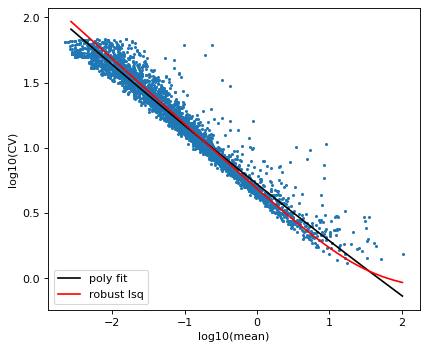

array([ 0.048889  , -0.07626458, -0.02784309, ...,  0.78019458,
        0.59314723,  0.22144539])

In [8]:
skin.chen2016_fit(ada, plot = True, verbose = True)

## create a Xct obj with GRN building:

In [9]:
obj1 = Xct(ada, 'Inflam. FIB', 'Inflam. DC', build_GRN = False, pcNet_name = 'skin_net', mode = 'full', verbose = True)

print(obj1)

init an Xct object for interactions from Inflam. FIB (484) to Inflam. DC (81)...
loading GRNs...
building correspondence...
init completed.
Xct object for interactions from Inflam. FIB (484) to Inflam. DC (81)
# of genes = 3000 X 3000 
Correspondence = 6000 X 6000


In [10]:
df1 = obj1.fill_metric()
df1

,ligand,receptor,mean_L,mean_R,var_L,var_R,disp_L,disp_R,cv_L,cv_R,cv_res_L,cv_res_R
18,IGF1,NTRK2,0.029522,0.024446,0.067410,0.027285,2.283343,1.116142,8.794479,6.757026,0.156436,-0.338065
28,AREG,NTRK2,0.003443,0.024446,0.005726,0.027285,1.663072,1.116142,21.977261,6.757026,-0.221117,-0.338065
33,FGF2,NTRK2,0.076530,0.024446,0.142827,0.027285,1.866276,1.116142,4.938230,6.757026,-0.075862,-0.338065
35,FGF7,NTRK2,0.449156,0.024446,0.835224,0.027285,1.859543,1.116142,2.034720,6.757026,0.023099,-0.338065
53,BDNF,NTRK2,0.009386,0.024446,0.016305,0.027285,1.737234,1.116142,13.604940,6.757026,-0.094830,-0.338065
...,...,...,...,...,...,...,...,...,...,...,...,...
7884,LAMB1,SV2B,0.192922,0.015761,0.356617,0.019873,1.848509,1.260899,3.095425,8.944272,-0.019347,-0.338065
7890,LAMC3,SV2B,0.343355,0.015761,0.610706,0.019873,1.778645,1.260899,2.276004,8.944272,-0.046932,-0.338065
7894,LAMB2,SV2B,1.027162,0.015761,1.343443,0.019873,1.307918,1.260899,1.128420,8.944272,-0.030466,-0.338065
8023,FSTL1,DIP2A,1.154967,0.066773,1.490066,0.086209,1.290138,1.291068,1.056898,4.397163,0.014484,-0.313400


## permutation mode:

In [11]:
# np.random.seed(1)

# orig_score = np.asarray(obj1.score(method=1))
# pmt_scores = scores(ada, obj1, method = 1, a = 0.8, n = 100)

# enriched, pvals, counts = pmt_test(orig_score, pmt_scores)
# #enriched, counts

# df_enriched = df1.iloc[enriched, :]
# print('Total enriched:', len(df_enriched))
# df_enriched

## mode 'full':

In [12]:
obj1._net_A.shape, obj1._net_B.shape, obj1._w.shape #check

((3000, 3000), (3000, 3000), (6000, 6000))

In [13]:
w12 = obj1._w[:obj1._net_A.shape[0], obj1._net_A.shape[1]:]

np.mean(w12)  

1.0002169791476756

In [14]:
#selected LR pairs
candidates = obj1.get_candidates(df1)
print(len(candidates))
candidates[:5]

160


['IGF1_NTRK2', 'AREG_NTRK2', 'FGF2_NTRK2', 'FGF7_NTRK2', 'BDNF_NTRK2']

Net(
  (linear1): Linear(in_features=484, out_features=124, bias=True)
  (linear2): Linear(in_features=124, out_features=31, bias=True)
  (linear3): Linear(in_features=31, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=81, out_features=48, bias=True)
  (linear2): Linear(in_features=48, out_features=12, bias=True)
  (linear3): Linear(in_features=12, out_features=2, bias=True)
)
0 5423.125
99 602.3767700195312
199 534.5269165039062
299 498.17755126953125
399 481.08807373046875
499 473.42510986328125
599 469.24267578125
699 466.740966796875
799 465.18585205078125
899 464.21026611328125
999 463.5728454589844


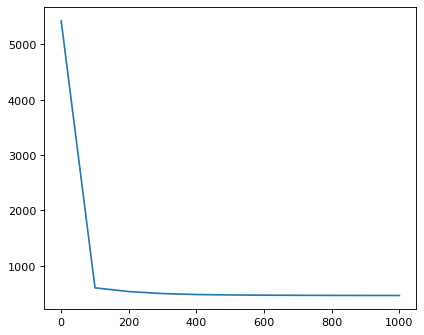

In [15]:
projections, losses = Xct.nn_projection(obj1, d = 2, n = 1000, lr = 0.001, plot_loss = True)

In [16]:
# np.savetxt("./data/skin_projections_pair.csv", projections, delimiter="\t")

# projections = np.genfromtxt("./data/skin_projections_pair.csv", delimiter="\t")

In [17]:
df_nn = obj1.nn_aligned_dist(projections)
df_nn

computing pair-wise distances...
manifold aligned # of pairs: 9000000
adding column 'rank'...
adding column 'correspondence_score'...


,idx,dist,rank,correspondence_score
XIST_LAPTM4A,"(2477, 1016)",0.000001,1,1.108373e+02
PTRF_PTPRC,"(813, 2790)",0.000006,2,1.765379e+02
DUSP1_CXCR4,"(2097, 2548)",0.000008,3,1.436162e+02
CLEC3B_XIST,"(2877, 2477)",0.000010,4,1.099613e+02
HNRNPH1_SERPINF1,"(765, 1973)",0.000010,5,1.189237e+02
...,...,...,...,...
BCL2L15_C1orf228,"(1, 1338)",0.028988,8999996,1.659775e-23
BCL2L15_F12,"(1, 740)",0.028988,8999997,1.659775e-23
BCL2L15_SHBG,"(1, 1334)",0.028988,8999998,1.659775e-23
BCL2L15_DISP1,"(1, 1354)",0.028988,8999999,1.659775e-23


In [18]:
#df_nn_to_output = df_nn.iloc[:1000, :]
#df_nn_to_output.to_csv('distances_nn.csv')

[[ 1.         -0.16488184]
 [-0.16488184  1.        ]]


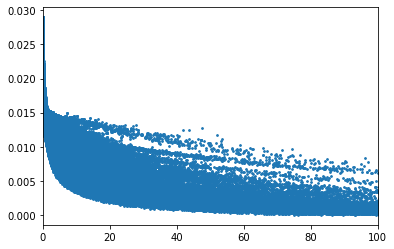

In [19]:
#check corr
select = df_nn['correspondence_score'] != 0
nX = np.asarray(df_nn['correspondence_score'][select])
nY = np.asarray(df_nn['dist'][select])
r = np.corrcoef(nX, nY)
print(r)

plt.scatter(nX, nY, s=3)
plt.xlim(0, 100)
plt.show()

In [20]:
# df_nn_filtered = df_nn.loc[candidates]
# len(df_nn_filtered)

In [21]:
df_nn_filtered = filtered_nn_aligned_dist(df_nn, candidates)
df_nn_filtered.head()

manifold aligned # of L-R pairs: 160


,idx,dist,rank,correspondence_score,rank_filtered
VCAM1_ITGB2,"(1458, 491)",0.000474,8712,106.982370,1
CCL2_CXCR4,"(2820, 2548)",0.000779,14430,540.281406,2
CXCL12_CXCR4,"(2919, 2548)",0.000835,15391,536.626422,3
CXCL14_CXCR4,"(2994, 2548)",0.000879,16079,862.240276,4
CCL2_CCR7,"(2820, 2138)",0.001036,18186,807.705825,5


In [22]:
df_enriched = chi2_test(df_nn, df = 3, pval = 0.05, FDR = True, candidates = candidates)

df_enriched


Total enriched: 13 / 9000000


,idx,dist,rank,correspondence_score,q_val,rank_filtered
VCAM1_ITGB2,"(1458, 491)",0.000474,8712,106.982370,0.001814,1
CCL2_CXCR4,"(2820, 2548)",0.000779,14430,540.281406,0.004872,2
CXCL12_CXCR4,"(2919, 2548)",0.000835,15391,536.626422,0.005618,3
CXCL14_CXCR4,"(2994, 2548)",0.000879,16079,862.240276,0.006272,4
CCL2_CCR7,"(2820, 2138)",0.001036,18186,807.705825,0.009104,5
CCL19_CXCR4,"(2993, 2548)",0.001089,18757,1964.685417,0.010226,6
CXCL12_CCR7,"(2919, 2138)",0.001092,18807,802.241724,0.010299,7
CCL2_TNF,"(2820, 2815)",0.001128,19199,159.410090,0.011114,8
CXCL14_CCR7,"(2994, 2138)",0.001136,19303,1289.025469,0.011297,9
CXCL1_CCR7,"(2596, 2138)",0.001226,20261,107.058778,0.013517,10


In [23]:
df_nn_filtered.loc['CCL19_CCR7']

idx                     (2993, 2138)
dist                        0.001346
rank                           21329
correspondence_score     2937.150598
rank_filtered                     11
Name: CCL19_CCR7, dtype: object

#### visualization:

In [24]:
Xct.add_names_to_nets(obj1)

completed.


In [25]:
targets = vis.get_Xct_pairs(df_enriched)
targets

(['VCAM1', 'ITGB2'],
 ['CCL2', 'CXCR4'],
 ['CXCL12', 'CXCR4'],
 ['CXCL14', 'CXCR4'],
 ['CCL2', 'CCR7'],
 ['CCL19', 'CXCR4'],
 ['CXCL12', 'CCR7'],
 ['CCL2', 'TNF'],
 ['CXCL14', 'CCR7'],
 ['CXCL1', 'CCR7'],
 ['CCL19', 'CCR7'],
 ['CXCL1', 'CXCR4'],
 ['CTGF', 'ITGB2'])

identified 217 TF(s) along with 2 ligand/receptor target(s)
undirected graph constructed: 
# of nodes: 32, # of edges: 40


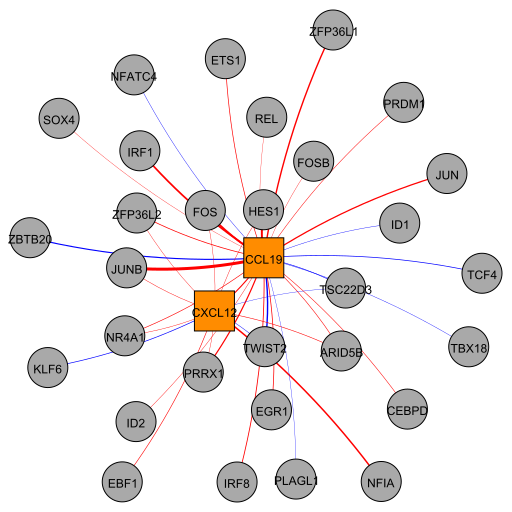

In [26]:
vis.plot_pcNet(obj1, view='sender', target=['CCL19', 'CXCL12'], top_edges=40, show = True, verbose = True)

identified 217 TF(s) along with 2 ligand/receptor target(s)
undirected graph constructed: 
# of nodes: 31, # of edges: 40


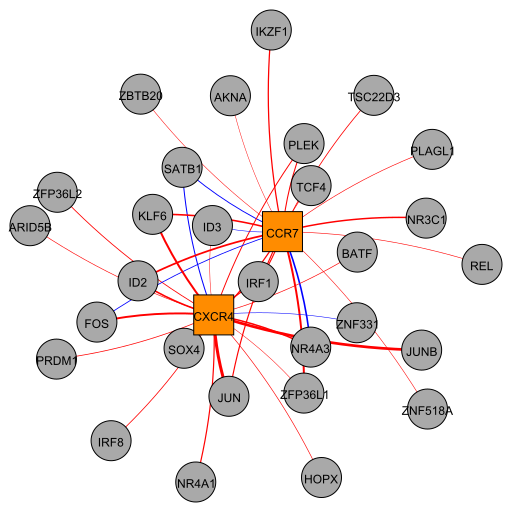

In [27]:
vis.plot_pcNet(obj1, view='receiver', target=['CCR7', 'CXCR4'], top_edges=40, show = True, verbose = True)

In [28]:
g1 = vis.plot_pcNet(obj1, view='sender', target=['CCL19', 'CXCL12'], top_edges=40, show = False, verbose = True)
g2 = vis.plot_pcNet(obj1, view='receiver', target=['CCR7', 'CXCR4'], top_edges=40, show = False, verbose = True)

identified 217 TF(s) along with 2 ligand/receptor target(s)
undirected graph constructed: 
# of nodes: 32, # of edges: 40
identified 217 TF(s) along with 2 ligand/receptor target(s)
undirected graph constructed: 
# of nodes: 31, # of edges: 40


merged graphs: 
# of nodes: 63, # of edges: 80
edge from CCL19 to CCR7 added
edge from CXCL12 to CXCR4 added


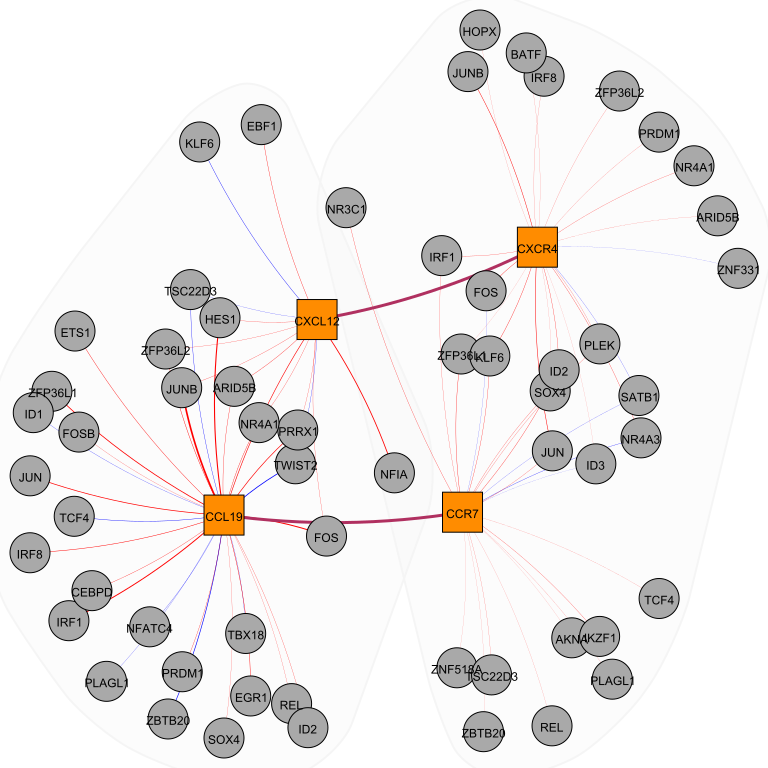

In [29]:
vis.plot_XNet(g1, g2, Xct_pair = [('CCL19', 'CCR7'), ('CXCL12', 'CXCR4')], verbose = True)

identified 216 TF(s) along with 1 ligand/receptor target(s)
undirected graph constructed: 
# of nodes: 21, # of edges: 20
identified 216 TF(s) along with 1 ligand/receptor target(s)
undirected graph constructed: 
# of nodes: 21, # of edges: 20
merged graphs: 
# of nodes: 42, # of edges: 40
edge from VCAM1 to ITGB2 added


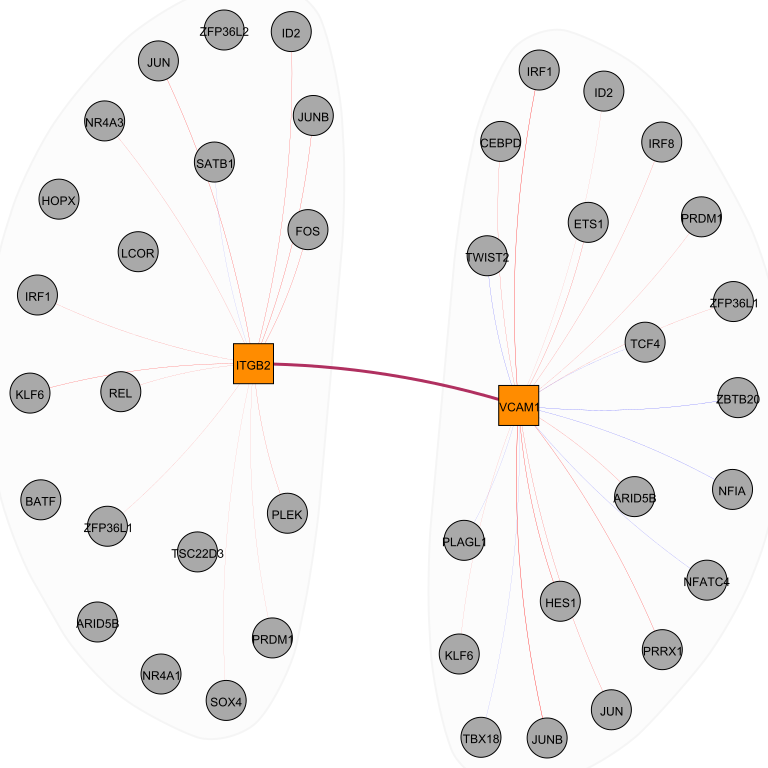

In [30]:
g1 = vis.plot_pcNet(obj1, view='sender', target=[targets[0][0]], top_edges=20, show = False, verbose = True)
g2 = vis.plot_pcNet(obj1, view='receiver', target=[targets[0][1]], top_edges=20, show = False, verbose = True)
vis.plot_XNet(g1, g2, Xct_pair = [targets[0]], verbose = True)

In [31]:
# i = 0 
# for p in candidates:
#     if df_nn.loc[p].values[2] < 200: #rank < ?
#         i += 1
#         print(p, "idx, dist, rank, score, rank%:", ' '.join(map(str, df_nn.loc[p].values)), f'{round(100* df_nn.loc[p].values[2]/len(df_nn), 5)}%')

# print('\nTotal enriched:', i)

## mode 'comb':

In [32]:
obj2 = Xct(ada, 'Inflam. FIB', 'Inflam. DC', build_GRN = False, pcNet_name = 'skin_net', mode = 'comb', verbose = True)

init an Xct object for interactions from Inflam. FIB (484) to Inflam. DC (81)...
loading GRNs...
building correspondence...
init completed.


In [33]:
w12 = obj2._w[:obj2._net_A.shape[0], obj2._net_A.shape[1]:]

np.mean(w12)  

0.024279120407368276

Net(
  (linear1): Linear(in_features=484, out_features=124, bias=True)
  (linear2): Linear(in_features=124, out_features=31, bias=True)
  (linear3): Linear(in_features=31, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=81, out_features=48, bias=True)
  (linear2): Linear(in_features=48, out_features=12, bias=True)
  (linear3): Linear(in_features=12, out_features=2, bias=True)
)
0 122.20376586914062
99 36.462127685546875
199 32.662776947021484
299 28.188762664794922
399 26.78423500061035
499 26.054107666015625
599 25.80288314819336
699 25.4305419921875
799 25.46610450744629
899 25.070537567138672
999 24.97801971435547


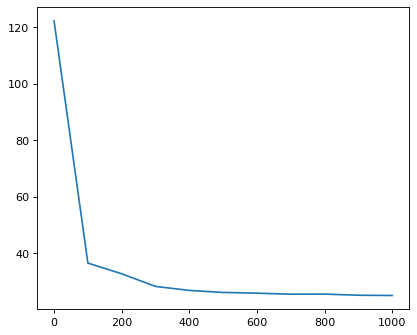

In [34]:
projections2, losses2 = obj2.nn_projection(n = 1000, plot_loss = True)

In [35]:
# np.savetxt("./data/skin_projections_comb.csv", projections2, delimiter="\t")

# projections2 = np.genfromtxt("./data/skin_projections_comb.csv", delimiter="\t")

In [38]:
df_nn2 = obj2.nn_aligned_dist(projections2)
df_nn2.head()

computing pair-wise distances...
manifold aligned # of pairs: 9000000
adding column 'rank'...
adding column 'correspondence_score'...


,idx,dist,rank,correspondence_score
CXCL14_HLA-DPA1,"(2994, 2987)",0.000007,1,1669.730279
CXCL14_HLA-DPB1,"(2994, 2983)",0.000056,2,1666.246155
CCL19_CD1A,"(2993, 1668)",0.000136,3,1978.265143
CCL19_CXCR4,"(2993, 2548)",0.000159,4,1964.685417
CCL19_CD83,"(2993, 1614)",0.000256,5,2310.091743


[[ 1.         -0.33741998]
 [-0.33741998  1.        ]]


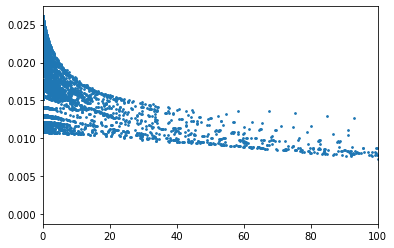

In [39]:
#check corr
select = df_nn2['correspondence_score'] != 0
nX = np.asarray(df_nn2['correspondence_score'][select])
nY = np.asarray(df_nn2['dist'][select])
r = np.corrcoef(nX, nY)
print(r)

plt.scatter(nX, nY, s=3)
plt.xlim(0, 100)
plt.show()

In [40]:
#df_nn_to_output2 = df_nn2.iloc[:1000, :]
#df_nn_to_output2.to_csv('distances_nn2.csv')

In [41]:
df_enriched2 = chi2_test(df_nn2, df = 3, pval = 0.05, FDR = True, candidates = candidates)
df_enriched2


Total enriched: 0 / 9000000


,idx,dist,rank,correspondence_score,q_val,rank_filtered


## mode pairs:

In [42]:
obj3 = Xct(ada, 'Inflam. FIB', 'Inflam. DC', build_GRN = False, pcNet_name = 'skin_net', mode = 'pairs', verbose = True)

init an Xct object for interactions from Inflam. FIB (484) to Inflam. DC (81)...
loading GRNs...
building correspondence...
init completed.


In [43]:
w12 = obj3._w[:obj3._net_A.shape[0], obj3._net_A.shape[1]:]

np.mean(w12)  

0.018124978122391625

Net(
  (linear1): Linear(in_features=484, out_features=124, bias=True)
  (linear2): Linear(in_features=124, out_features=31, bias=True)
  (linear3): Linear(in_features=31, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=81, out_features=48, bias=True)
  (linear2): Linear(in_features=48, out_features=12, bias=True)
  (linear3): Linear(in_features=12, out_features=2, bias=True)
)
0 91.05137634277344
99 27.237743377685547
199 23.574460983276367
299 21.075862884521484
399 20.339221954345703
499 20.182231903076172
599 19.630210876464844
699 19.41043472290039
799 19.323551177978516
899 19.183713912963867
999 19.173681259155273


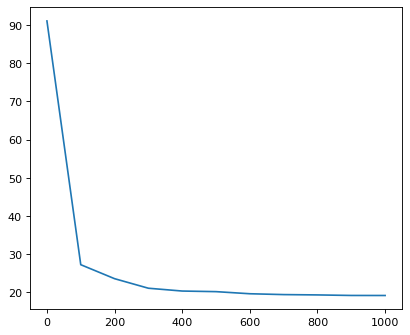

In [44]:
projections3, losses3 = obj3.nn_projection(n = 1000, plot_loss = True)

In [45]:
# np.savetxt("./data/skin_projections_all.csv", projections3, delimiter="\t")

# projections3 = np.genfromtxt("./data/skin_projections_all.csv", delimiter="\t")

In [46]:
df_nn3 = obj3.nn_aligned_dist(projections3)
df_nn3.head()

computing pair-wise distances...
manifold aligned # of pairs: 9000000
adding column 'rank'...
adding column 'correspondence_score'...


,idx,dist,rank,correspondence_score
APOE_HLA-DPA1,"(2975, 2987)",0.000027,1,1301.987254
POSTN_HLA-DPB1,"(2977, 2983)",0.000044,2,1363.317986
POSTN_HLA-DPA1,"(2977, 2987)",0.000051,3,1366.168687
APOE_HLA-DPB1,"(2975, 2983)",0.000056,4,1299.270477
CCL19_CD1A,"(2993, 1668)",0.000096,5,1978.265143


[[ 1.         -0.35496395]
 [-0.35496395  1.        ]]


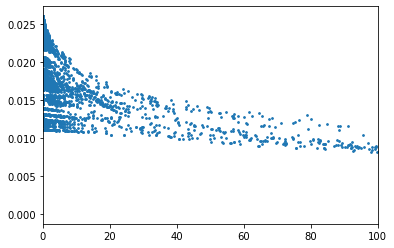

In [47]:
#check corr
select = df_nn3['correspondence_score'] != 0
nX = np.asarray(df_nn3['correspondence_score'][select])
nY = np.asarray(df_nn3['dist'][select])
r = np.corrcoef(nX, nY)
print(r)

plt.scatter(nX, nY, s=3)
plt.xlim(0, 100)
plt.show()

In [48]:
#df_nn_to_output3 = df_nn3.iloc[:20000, :]
#df_nn_to_output3.to_csv('distances_nn3.csv')

In [49]:
df_enriched3 = chi2_test(df_nn3, df = 3, pval = 0.05, FDR = True, candidates = candidates)

df_enriched3


Total enriched: 1 / 9000000


,idx,dist,rank,correspondence_score,q_val,rank_filtered
CCL19_CXCR4,"(2993, 2548)",0.000115,6,1964.685417,0.035289,1


### Inflam.DC to Inflam. TC:

In [50]:
# obj1 = Xct(ada, 'Inflam. DC', 'Inflam. TC', build_GRN = True, save_GRN = True,
#            pcNet_name = 'net_DC2TC_LS', mode = 'full', verbose = True)

obj1 = Xct(ada, 'Inflam. DC', 'Inflam. TC', build_GRN = False,
           pcNet_name = 'net_DC2TC_LS', mode = 'full', verbose = True)
print(obj1)

init an Xct object for interactions from Inflam. DC (81) to Inflam. TC (266)...
loading GRNs...
building correspondence...
init completed.
Xct object for interactions from Inflam. DC (81) to Inflam. TC (266)
# of genes = 3000 X 3000 
Correspondence = 6000 X 6000


In [51]:
df1 = obj1.fill_metric()
df1

,ligand,receptor,mean_L,mean_R,var_L,var_R,disp_L,disp_R,cv_L,cv_R,cv_res_L,cv_res_R
18,IGF1,NTRK2,0.015782,0.188672,0.019926,0.382669,1.262558,2.028219,8.944272,3.278712,-0.338065,-0.067928
28,AREG,NTRK2,0.302649,0.188672,0.695448,0.382669,2.297869,2.028219,2.755452,3.278712,0.082755,-0.067928
40,EFNA1,NTRK2,0.040046,0.188672,0.071560,0.382669,1.786941,2.028219,6.679971,3.278712,-0.060825,-0.067928
56,VEGFA,NTRK2,0.264259,0.188672,0.576541,0.382669,2.181724,2.028219,2.873324,3.278712,0.190714,-0.067928
198,CD8A,LAT,0.016989,0.746377,0.023090,1.278990,1.359118,1.713596,8.944272,1.515218,-0.338065,-0.006231
...,...,...,...,...,...,...,...,...,...,...,...,...
7370,CXCL8,LPAR2,0.834715,0.057883,2.376544,0.159946,2.847133,2.763275,1.846864,6.909344,0.391188,0.082742
7703,IL32,PTGER1,1.086030,0.014364,1.565225,0.054677,1.441235,3.806483,1.151984,16.278821,0.062660,0.219659
7882,PCSK1N,GPR171,0.015782,0.582902,0.019926,1.139179,1.262558,1.954321,8.944272,1.831049,-0.338065,-0.010688
7920,CLEC2D,KLRB1,0.077279,0.373006,0.140790,1.048742,1.821834,2.811599,4.855375,2.745485,0.041242,0.323326


In [52]:
#selected LR pairs
candidates = obj1.get_candidates(df1)
print(len(candidates))
candidates[:5]

231


['IGF1_NTRK2', 'AREG_NTRK2', 'EFNA1_NTRK2', 'VEGFA_NTRK2', 'CD8A_LAT']

Net(
  (linear1): Linear(in_features=81, out_features=48, bias=True)
  (linear2): Linear(in_features=48, out_features=12, bias=True)
  (linear3): Linear(in_features=12, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=266, out_features=92, bias=True)
  (linear2): Linear(in_features=92, out_features=23, bias=True)
  (linear3): Linear(in_features=23, out_features=2, bias=True)
)
0 6357.74755859375
99 700.3829956054688
199 543.38916015625
299 502.55035400390625
399 489.3795471191406
499 484.6355285644531
599 482.5810546875
699 481.4896240234375
799 480.8389587402344
899 480.422607421875
999 480.13079833984375
1099 479.9136657714844
1199 479.7572937011719
1299 479.63104248046875
1399 479.534423828125
1499 479.44744873046875
1599 479.364501953125
1699 479.3064270019531
1799 479.2594299316406
1899 479.51397705078125
1999 479.16973876953125
2099 479.1313171386719
2199 479.2700500488281
2299 479.0765075683594
2399 479.04388427734375
2499 479.0085144042969
2599 478.990539550781

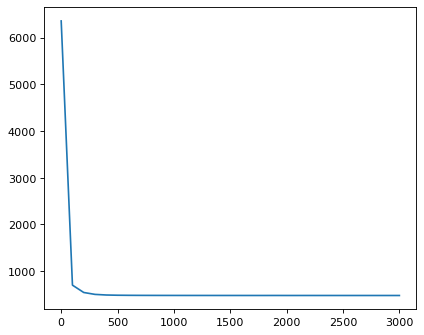

In [53]:
projections, losses = Xct.nn_projection(obj1, d = 2, n = 3000, lr = 0.001, plot_loss = True)

In [54]:
df_nn = obj1.nn_aligned_dist(projections)
df_nn.head()

computing pair-wise distances...
manifold aligned # of pairs: 9000000
adding column 'rank'...
adding column 'correspondence_score'...


,idx,dist,rank,correspondence_score
NR4A3_PHTF2,"(527, 1507)",0.000003,1,158.147625
WFDC21P_SAT1,"(2961, 2397)",0.000003,2,181.838519
HNRNPH1_TNF,"(765, 2815)",0.000003,3,149.750497
HLA-DPB1_CST7,"(2983, 2099)",0.000004,4,214.370101
JUN_SLA,"(2681, 762)",0.000004,5,182.252546


[[ 1.         -0.14833108]
 [-0.14833108  1.        ]]


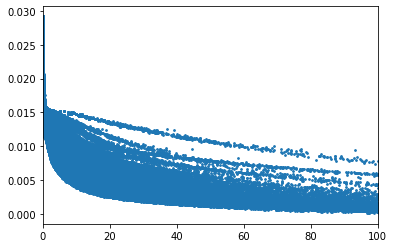

In [55]:
#check corr
select = df_nn['correspondence_score'] != 0
nX = np.asarray(df_nn['correspondence_score'][select])
nY = np.asarray(df_nn['dist'][select])
r = np.corrcoef(nX, nY)
print(r)

plt.scatter(nX, nY, s=3)
plt.xlim(0, 100)
plt.show()

In [56]:
df_enriched = chi2_test(df_nn, df = 3, pval = 0.05, FDR = True, candidates = candidates)

df_enriched


Total enriched: 10 / 9000000


,idx,dist,rank,correspondence_score,q_val,rank_filtered
S100A8_CD69,"(2766, 2943)",0.000042,183,241.362395,0.000061,1
CCL17_CXCR4,"(2990, 2548)",0.000236,3379,725.900652,0.000581,2
S100B_TNF,"(2883, 2815)",0.000243,3485,104.641324,0.000618,3
HLA-DMA_CD74,"(2065, 2991)",0.000331,4802,260.878213,0.001132,4
CCL22_CXCR4,"(2937, 2548)",0.000407,5924,271.270722,0.001699,5
CXCL8_CXCR4,"(2941, 2548)",0.000655,9633,139.055943,0.004353,6
S100A8_ITGB2,"(2766, 491)",0.001223,17856,57.807664,0.015307,7
CCL17_CXCR6,"(2990, 509)",0.001547,21143,412.759866,0.026131,8
CCL22_CXCR6,"(2937, 509)",0.001720,22844,154.249299,0.033289,9
CXCL8_CXCR6,"(2941, 509)",0.001969,25193,79.069652,0.045259,10


In [60]:
Xct.add_names_to_nets(obj1)

completed.


In [57]:
targets = vis.get_Xct_pairs(df_enriched)
targets

(['S100A8', 'CD69'],
 ['CCL17', 'CXCR4'],
 ['S100B', 'TNF'],
 ['HLA-DMA', 'CD74'],
 ['CCL22', 'CXCR4'],
 ['CXCL8', 'CXCR4'],
 ['S100A8', 'ITGB2'],
 ['CCL17', 'CXCR6'],
 ['CCL22', 'CXCR6'],
 ['CXCL8', 'CXCR6'])

identified 218 TF(s) along with 3 ligand/receptor target(s)
undirected graph constructed: 
# of nodes: 21, # of edges: 30
identified 216 TF(s) along with 3 ligand/receptor target(s)
undirected graph constructed: 
# of nodes: 31, # of edges: 30
merged graphs: 
# of nodes: 52, # of edges: 60
edge from CCL17 to CXCR4 added
edge from CCL22 to CXCR4 added
edge from CXCL8 to CXCR4 added


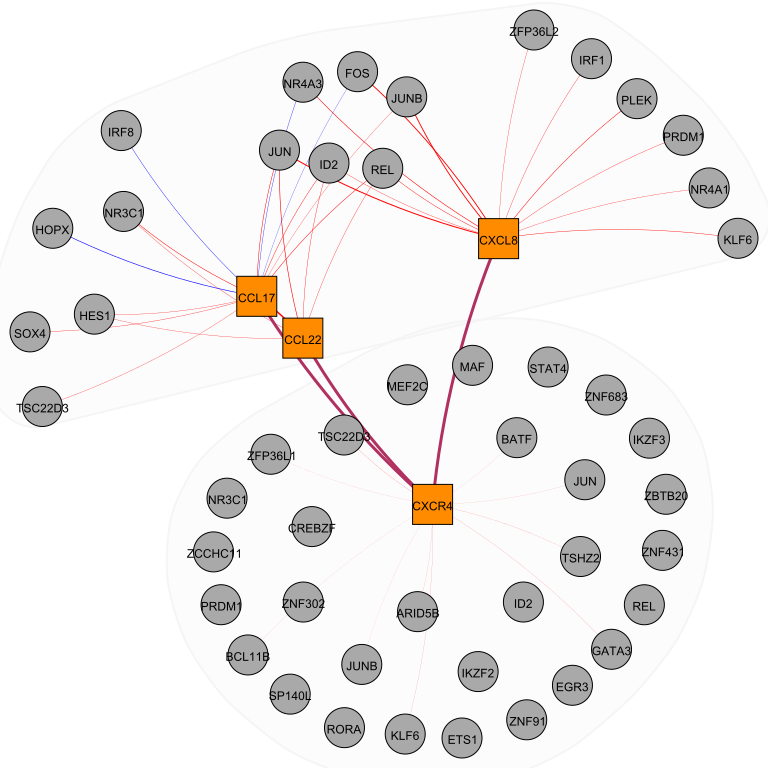

In [64]:
g1 = vis.plot_pcNet(obj1, view='sender', target=[targets[1][0], targets[4][0], targets[5][0]], top_edges=30, show = False, verbose = True)
g2 = vis.plot_pcNet(obj1, view='receiver', target=[targets[1][1], targets[4][1], targets[5][1]], top_edges=30, show = False, verbose = True)

vis.plot_XNet(g1, g2, Xct_pair = [targets[1], targets[4], targets[5]], verbose = True)